Modules

In [1]:
import biota.steadyfluxes as steady
import matplotlib.pyplot as plt

---------------------------------------------

Specify bioreactor parameters and construct bioreactor class instance from them.
Values are derived from the 20,000 litre stirred aerated tank example case from Humbird https://doi.org/10.31224/osf.io/795su . Fed batch operation is considered here, no perfusion.

In [2]:
workingVolume = 20000
tankDiameter = 2.34
impellerDiameter = tankDiameter/3
rpm = 42.3
backPressure = 1.3
superficialVel = 0.004
moleFracO2 = 0.21
initVol = 0.76 * workingVolume
initCells = 0.6e6
temp = 310
powerNumber = 5
mediumDensity = 1000
mediumViscosity = 9e-4
vesselVolDay = 0.0
perfLactateRate = 5.0
perfAmmrate = 5.0

STR_Humbird_20kl = steady.Bioreactor(wv=workingVolume,t=tankDiameter,d=impellerDiameter,n=rpm,p_back=backPressure,u_s=superficialVel,mf_O2_gas=moleFracO2,v0=initVol,ns=initCells,Temp=temp,
                                     Np=powerNumber,rho=mediumDensity,mu=mediumViscosity,vvd=vesselVolDay,perfAMM=perfAmmrate,perfLAC=perfLactateRate)


-----------------------------------------

Specify cell parameters and create instance of cell class from them. Values are derived from the un-enhanced CHO model of Humbird https://doi.org/10.31224/osf.io/795su for the two doublings production scenario.

In [3]:
growthRate = 0.029

glutamineUptakeRate = 0
glucoseUptakeRate = 0
oxygenUptakeRate = 0.45
uptakeList = [glutamineUptakeRate, glucoseUptakeRate, oxygenUptakeRate]

carbonDioxideProdRate = 0.57
ammoniaProductionRate = 0.092
lactateProductionRate = 0.624
prodList = [carbonDioxideProdRate, ammoniaProductionRate, lactateProductionRate]

massDensity = 1030
cellRadius = 18e-6
wetmass = 3000
dryMassFraction = 0.3

ammoniaLimit = 5
lactateLimit = 50
CO2Limit = 100
turbLengthLimit = 20e-6
limitsList = [ammoniaLimit, lactateLimit, CO2Limit, turbLengthLimit]


cell_Humbird = steady.Cell(mu=growthRate,uptakes=uptakeList,prod=prodList,rho=massDensity,rad=cellRadius,wetmass=wetmass,dmf=dryMassFraction,limits=limitsList)

-------------------------------------------------

Specify bounds and resolution for the brute force optimisation.

In [19]:
count = 30
bioreactor = STR_Humbird_20kl
cell = cell_Humbird
doublings = 5
rpmlims = (10,75)
supervellims = (0.0001,0.005)
celldenslims = (5.9e5,6.1e5)
showGraphs = True

Execute brute force optimisation function. 

119.50813457930091


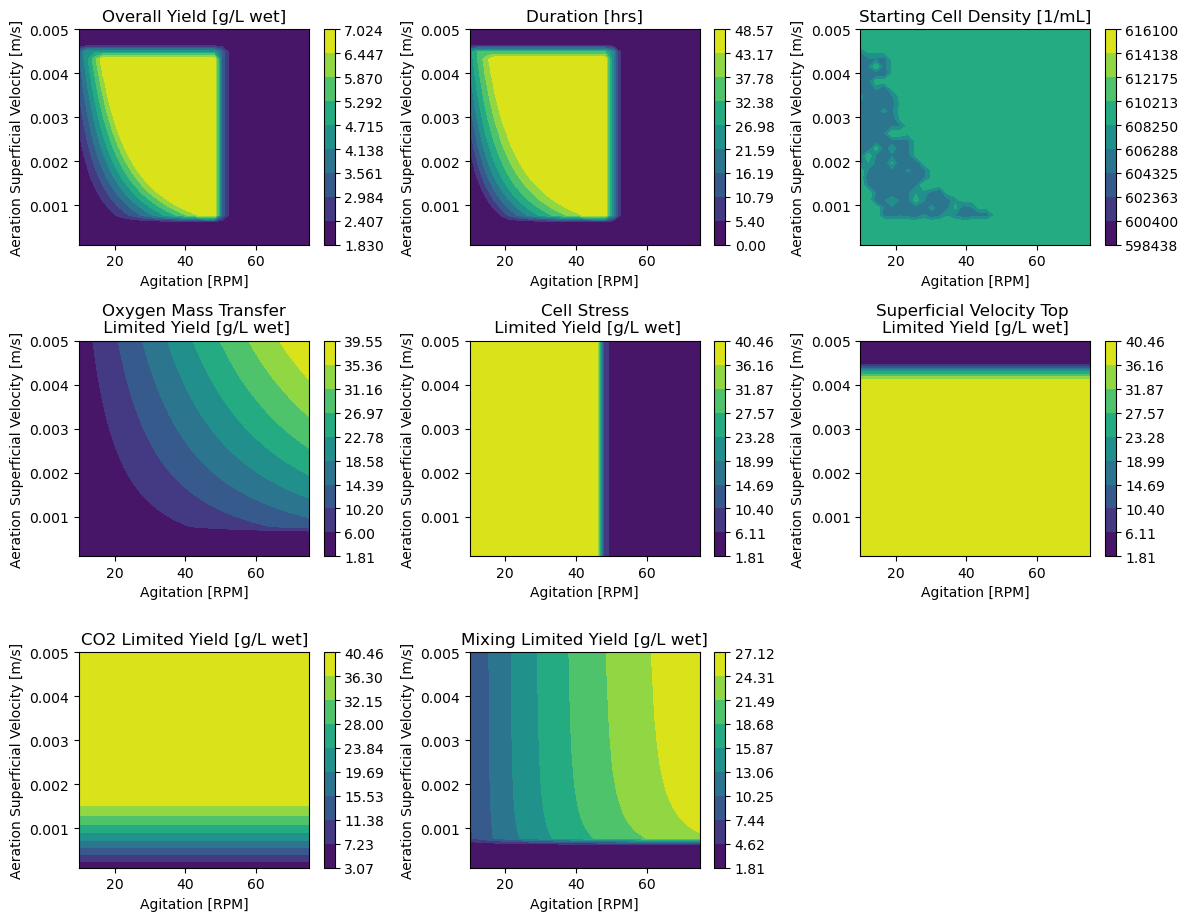

In [20]:
a = steady.brute(count=count,b=bioreactor,c=cell,dbls=doublings,rpmlims=rpmlims,uslims=supervellims,nslims=celldenslims,graphs=showGraphs)

-------------------------------------------------------------------

Dataframe returned by brute force optimisation function, showing the maximum overall yield and the maximum per constraint.

In [21]:
a

,Constraint,Maximum Yield [g/L wet]
0,overall,7.023688
1,ammonia,7.023688
2,lactate,9.481276
3,CO2,40.056011
4,kla,39.156926
5,mixing,26.849490
6,volume fraction,30.771754
7,hydrodynamic stress,40.056011
8,superficial velocity,40.056011
9,volume,7.897927


-------------------------------------------------

------------------------------